# **Advance Lane Line Finding** 

***
In this project, your goal is to write a software pipeline to identify the lane boundaries in a video from a front-facing camera on a car. The camera calibration images, test road images, and project videos are available in the project repository. There is an writeup template in the repostitory provided as a starting point for your writeup of the project.

---
Steps:
* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply the distortion correction to the raw image.  
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view"). 
* Detect lane pixels and fit to find lane boundary.
* Determine curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

In [2]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
import os
import ntpath
%matplotlib inline

# Utilies Functions

In [117]:
def camera_calibration():
    nx = 9 # of inner corners in x
    ny = 6 # of inner corners in y
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((ny*nx,3), np.float32)
    objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.

    # Make a list of calibration images
    images = glob.glob('camera_cal/*.jpg')

    # Step through the list and search for chessboard corners
    for idx, fname in enumerate(images):
        img = cv2.imread(fname)

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
            # Draw and display the corners
            cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
            directory = 'output_images/1_corners_found/'
            if not os.path.exists(directory):
                os.makedirs(directory)
            write_name = directory+'corners_found'+str(idx)+'.jpg'
            cv2.imwrite(write_name, img)
    cv2.destroyAllWindows()
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
    return mtx, dist


# UNDISTORT 
def cal_undistort(img, mtx, dist):
    undist = cv2.undistort(img, mtx, dist, None, None)
    return undist

# COLOR 
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=0):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    #print(scaled_sobel)
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    plt.figure(figsize=(5,5))
    #plt.imshow(binary_output, cmap='gray')
    #print(binary_output)
    return binary_output

# Save Images:
def save_images(image, fname, directory, isBinary = 'false'):
    if not os.path.exists(directory):
        os.makedirs(directory)
        write_name = directory + fname +'.jpg'
        cv2.imwrite(write_name, image)

In [118]:
# Step 1: Camera Calibration
mtx, dist = camera_calibration()

In [123]:
# Build the pipline
def FindLaneLinesAdvanced(image, fname, mtx, dist, orient='x', thresh_min = 20, thresh_max = 20):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    save_images(undist, fname, 'output_images/2_distortion_corrected/')
    grad_binary = abs_sobel_thresh(undist, orient='x', thresh_min=20, thresh_max=20)
    save_images(grad_binary, fname, 'output_images/3_color_transforms/', 'true')

    output = undist
    return output

solidWhiteRight.jpg
solidYellowLeft.jpg
test1.jpg
test2.jpg
test3.jpg
test4.jpg
test5.jpg
test6.jpg


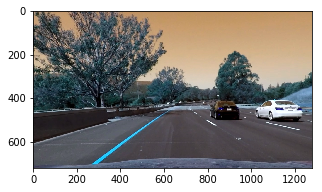

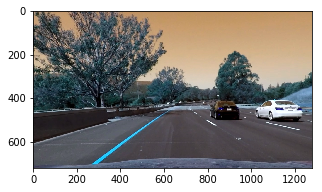

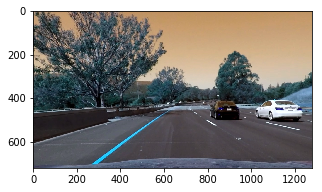

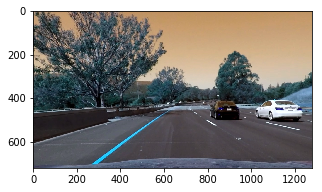

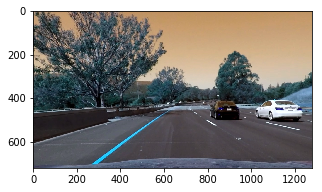

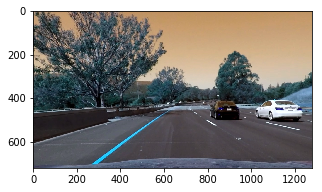

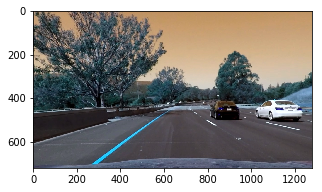

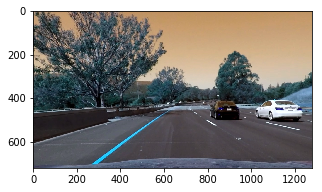

In [125]:
# Test with test images
for f in os.listdir("test_images/"):
    if not f.startswith('.'):
        image = cv2.imread('test_images/'+f)
        output = FindLaneLinesAdvanced(image, f, mtx, dist, 'x', 0, 1)
        print(f)
        fiture()
        plt.imshow(output, cmap = 'gray') 

## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`project_video.mp4`

`challenge_video.mp4`

`harder_challenge_video.mp4`

In [86]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [87]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image with lines are drawn on lanes)
    imshape = image.shape
    #lines_edges = findLaneLines(image,5,50,150,\
                  #vertices,10, np.pi/180, 10, 35,20)
    output = image
    return output

In [88]:
project_output = 'project_video_output.mp4'
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(project_output, audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████▉| 1260/1261 [00:52<00:00, 23.98it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 2.54 s, sys: 2.42 s, total: 4.96 s
Wall time: 54 s


In [91]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(project_output))

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 0))



NameError: name 'project_output' is not defined

In [ ]:
project_output